# Évaluation de la classification des textes
Cette évaluation ressemble beaucoup au projet de classification de texte que nous venons de terminer, et le jeu de données est très similaire.

Le jeu de données **moviereviews2.tsv** contient le texte de 6000 critiques de films. 3000 sont positives, 3000 sont négatives, et le texte a été prétraité sous la forme d'un fichier délimité par des tabulations. Comme précédemment, les étiquettes sont données comme `pos` et `neg`.

Nous avons inclus 20 critiques qui contiennent soit des données `NaN`, soit des chaînes composées d'espaces blancs.

Pour plus d'informations sur cet ensemble de données, visitez http://ai.stanford.edu/~amaas/data/sentiment/

### Tâche #1 : Effectuer les importations et charger le jeu de données dans un DataFrame pandas
Pour cet exercice, vous pouvez charger le jeu de données à partir de `'./moviereviews2.tsv'`.

In [23]:

from google.colab import drive
drive.mount('/content/drive')






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
cd drive/MyDrive

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [25]:
import pandas as pd


file_path = 'moviereviews2.tsv'
data = pd.read_csv(file_path, delimiter='\t')

In [26]:
data.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


:### Tâche #2 : Vérifier les valeurs manquantes :

In [27]:
print(len(data))

6000


In [28]:
# Check for NaN values:

data.isna().sum()

label      0
review    20
dtype: int64

In [29]:
# Check for whitespace strings (it's OK if there aren't any!):





# Vérifier si la colonne contient des chaînes de caractères qui sont juste des espaces blancs
espaces_blancs = data['review'].apply(lambda x: x.isspace() if isinstance(x, str) else False)

# Compter le nombre de tels cas
nombre_espaces_blancs = espaces_blancs.sum()
print("Nombre de chaînes composées uniquement d'espaces blancs :", nombre_espaces_blancs)

# Afficher les lignes avec des chaînes d'espaces blancs, si elles existent
if nombre_espaces_blancs > 0:
    print(data[espaces_blancs])




Nombre de chaînes composées uniquement d'espaces blancs : 0


### Tâche #3 : Supprimer les valeurs NaN :

In [30]:
data = data.dropna()

### Tâche #4 : Jetez un coup d'œil rapide à la colonne `label` :

In [31]:
data['label'].unique()

array(['pos', 'neg'], dtype=object)

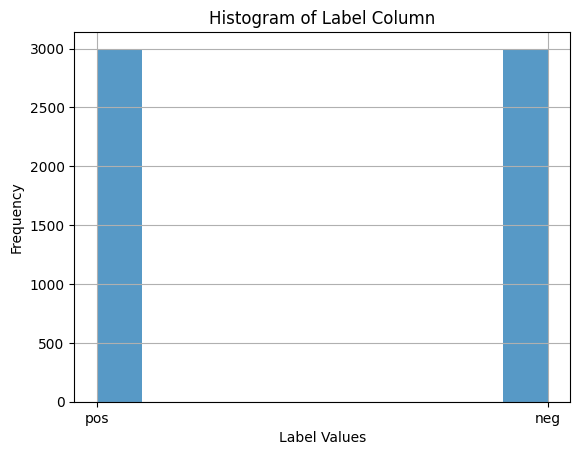

In [32]:
import matplotlib.pyplot as plt

plt.hist(data['label'], bins=10, alpha=0.75)
plt.xlabel('Label Values')
plt.ylabel('Frequency')
plt.title('Histogram of Label Column')
plt.grid(True)
plt.show()

Il n'y a pas de imbalance

### Tâche #5 : Diviser les données en ensembles d'entrainement et de test :
Vous pouvez utiliser les paramètres de votre choix. Pour comparer vos résultats à ma resolution, utilisez `test_size=0.33, random_state=42`

In [33]:
from sklearn.model_selection import train_test_split

# Séparation des caractéristiques et de la variable cible
X = data['review']
y = data['label']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)




### Tâche #6 : Construire un pipeline pour vectoriser la date, puis entraîner et ajuster un modèle
Vous pouvez utiliser le modèle de votre choix. Pour comparer vos résultats à ma résolution, utilisez `LinearSVC`.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC()),
])

text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])
pipeline.fit(X_train, y_train)
text_clf.fit(X_train, y_train)



Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

### Tâche #7 : Exécuter les prédictions et analyser les résultats

La methode qui etait donnée par le prof. TfidfVectorizer avec LinearSVC

Précision du modèle de PROF:               precision    recall  f1-score   support

         neg       0.93      0.91      0.92       991
         pos       0.91      0.94      0.92       983

    accuracy                           0.92      1974
   macro avg       0.92      0.92      0.92      1974
weighted avg       0.92      0.92      0.92      1974
 
 Accuracy : 0.9052684903748733 




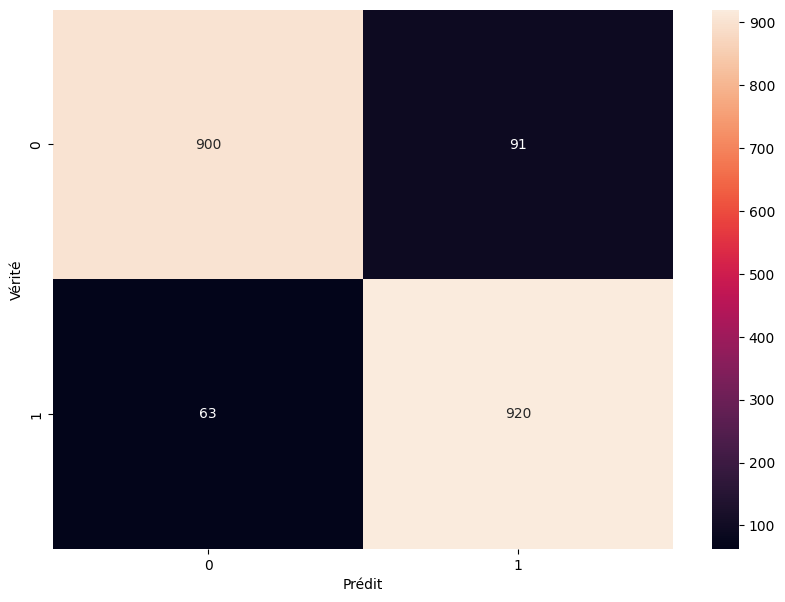

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


prediction_linearsvc = pipeline.predict(X_test)
predictions_bayes = text_clf.predict(X_test)
print(f"Précision du modèle de PROF: {classification_report(y_test,prediction_linearsvc)} \n Accuracy : { accuracy_score(y_test, predictions_bayes)} \n\n")
cm = confusion_matrix(y_test, prediction_linearsvc)

# Tracer la matrice de confusion
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prédit')
plt.ylabel('Vérité')
plt.show()


Le modèle PROF a une précision de 0.92 pour les deux catégories, avec une légère variation entre elles. Pour la catégorie 'neg', la précision est de 0.93, le rappel de 0.91 et le score F1 de 0.92, basé sur 991 échantillons. Pour la catégorie 'pos', la précision est de 0.91, le rappel de 0.94 et le score F1 de 0.92, basé sur 983 échantillons. La précision moyenne globale (accuracy) du modèle est de 0.92 pour un total de 1974 échantillons, avec une moyenne macro et pondérée pour la précision, le rappel et le score F1 de 0.92. La précision totale du modèle est de 0.9052684903748733.
En generale le modele marche bien ,apres on va voir la solution avec Naive Bayes.

SOLUTION NAIVE BAYES

"Précision du modèle bayes : 
              precision    recall  f1-score   support

         neg       0.87      0.95      0.91       991
         pos       0.94      0.86      0.90       983

    accuracy                           0.91      1974
   macro avg       0.91      0.91      0.91      1974
weighted avg       0.91      0.91      0.91      1974

Accuracy: 0.9052684903748733


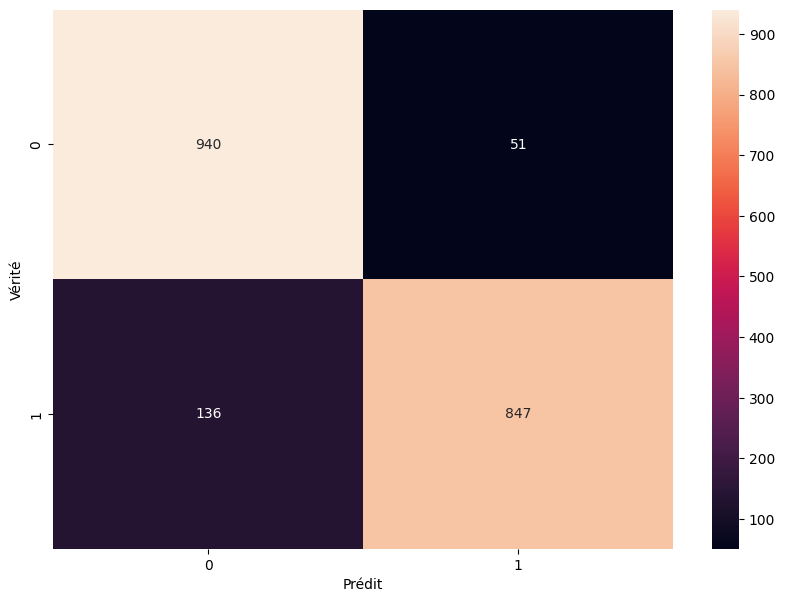

In [40]:
print('"Précision du modèle bayes : ')
predictions_bayes = text_clf.predict(X_test)

print(classification_report(y_test, predictions_bayes))
print("Accuracy:", accuracy_score(y_test, predictions_bayes))


cm = confusion_matrix(y_test, predictions_bayes)

# Tracer la matrice de confusion
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prédit')
plt.ylabel('Vérité')
plt.show()

 Les deux modèles, le modèle PROF et le modèle bayésien, présentent des performances similaires en termes de précision, de rappel et de score F1 pour les classes "neg" et "pos". Cependant, le modèle PROF affiche une légère amélioration de la précision pour la classe "neg" par rapport au modèle bayésien, tandis que le modèle bayésien présente une légère amélioration du rappel pour la classe "pos". En général, les deux modèles obtiennent des scores d'exactitude (accuracy) très proches, autour de 0.91, indiquant qu'ils sont tous deux capables de classifier les données avec une précision similaire.

---

